In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
import matplotlib.pyplot as plt

# Set default figure size
plt.rcParams['figure.figsize'] = (6, 4)  # width, height in inches

# Set default font sizes
plt.rcParams['font.size'] = 15  # Default font size
plt.rcParams['axes.titlesize'] = 15  # Title font size
plt.rcParams['axes.labelsize'] = 15  # Label font size
plt.rcParams['xtick.labelsize'] = 15  # x-axis tick label font size
plt.rcParams['ytick.labelsize'] = 15  # y-axis tick label font size
plt.rcParams['legend.fontsize'] = 15  # Legend font size
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [2]:
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'

In [3]:

figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure_loc_amp_drift'
misc.get_or_create_subdir(figdir)
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)


'/mnt/home/szheng/ceph/place_variability/data/paper'

In [4]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

In [5]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
occu_map_all = prepped_data_agg['occu_map_all']
fr_map_all = prepped_data_agg['fr_map_all']

pval_all = prepped_data_agg['pval_all']
X_pwc_all = prepped_data_agg['X_pwc_all']
X_raw_all = prepped_data_agg['X_raw_all']
changes_df_all = prepped_data_agg['changes_df_all']
var_res_all_test = prepped_data_agg['var_res_all']
# corr_all = prepped_data_agg['corr_all']
all_sw_d_all = prepped_data_agg['all_sw_d_all']
all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
best_n_all_test = prepped_data_agg['best_n_all']
spk_beh_df_all = prepped_data_agg['spk_beh_df_all']

pf_params_all = prepped_data_agg['pf_params_all']
all_fields_all = prepped_data_agg['all_fields_all']

ntrials_per_tt=fr_map_trial_df_all.groupby(level=(0,1,2,3)).apply(lambda x:x.dropna(axis=1,how='all').shape[1])
ntrials_mask = ntrials_per_tt.groupby(level=(0,1,2)).apply(lambda x:(x>=7).all()) 



In [19]:
spk_beh_df=spk_beh_df_all.loc[(ani,sess),:]

/tmp/ipykernel_1346286/2171042213.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  spk_beh_df=spk_beh_df_all.loc[('e13_26m1','e13_26m1_210913'),:]


In [47]:
subdb

data_dir_full  \
animal_name                                                        
e13_26m1    0  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e15_13f1    0  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            1  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            2  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            3  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
e13_26m1    1  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e13_16f1    7  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e13_26m1    2  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e16_3m2     3  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
            2  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e16_3m1     3  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e16_3m2     0  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e13_26m1    3  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
            4  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e16_3m1     2  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e13_16f1    8  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e16_3m1     1  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e13_16f1    0  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
            4  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
            1  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e15_10m1    5  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
            6  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
e13_16f1    2  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e15_9f1     4  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e14_2m2     2  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
e13_16f1    5  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
            6  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e15_10m1    3  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
e14_2m2     1  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
e16_1f1     9  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
            5  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e15_9f1     3  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e14_2m3     5  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            4  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
e16_1f1     3  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
            4  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e14_2m3     7  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            6  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
e15_9f1     5  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e16_1f1     6  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f...   
e15_9f1     2  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e16_2m1     2  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m...   
e15_10m1    4  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10...   
e15_9f1     0  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f...   
e14_2m3     3  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   
            2  /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m...   

                     sess_name animal_name.1        date  \
animal_name                                                
e13_26m1    0  e13_26m1_210913      e13_26m1  2021-09-13   
e15_13f1    0  e15_13f1_220117      e15_13f1  2022-01-17   
            1  e15_13f1_220118      e15_13f1  2022-01-18   
            2  e15_13f1_220119      e15_13f1  2022-01-19   
            3  e15_13f1_220120      e15_13f1  2022-01-20   
e13_26m1    1  e13_26m1_211019      e13_26m1  2021-10-19   
e13_16f1    7  e13_16f1_210328      e13_16f1  2021-03-28   
e13_26m1    2  e13_26m1_211116      e13_26m1  2021-11-16   
e16_3m2     3   e16_3m2_211213       e16_3m2  2021-12-13   
            2   e16_3m2_211212       e16_3m2  2021-12-12   
e16_3m1     3   e16_3m1_210203       e16_3m1  2021-02-03   
e16_3m

In [48]:
# ani='e15_13f1'
# sess='e15_13f1_220117'

In [18]:
(best_n_all_test.loc['e13_26m1','e13_26m1_210913',0]>0).mean()

/tmp/ipykernel_1346286/2604784496.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  (best_n_all_test.loc['e13_26m1','e13_26m1_210913',0]>0).mean()


0.39878048780487807

In [439]:
# prepped_data_agg['pf_params_all']=pf_params_all
# prepped_data_agg['all_fields_all']=all_fields_all
# pickle.dump(prepped_data_agg,open(fn_full,'wb'))

In [434]:
# all_fields_all = {}
# pf_params_all = {}
# for k,row in subdb.iterrows():
#     ddf=row['data_dir_full']
#     sess=row['sess_name']
#     ani = row['animal_name.1']
#     pf_res = pf.field_detection_avg_wrapper(ddf, dosave=False,force_reload=False, load_only=True,
#                                             save_fn='place_field_afterheadscan.p',
#                                             shuffle_fn='frmap_null_afterheadscan.p',
#                                            )
#     all_fields = pd.concat(pf_res['all_fields'],axis=0)
#     pf_params = pd.concat(pf_res['params'],axis=0)
#     pf_params_all[ani,sess] = pf_params
#     all_fields_all[ani,sess] = all_fields
# pf_params_all = pd.concat(pf_params_all,axis=0)
# all_fields_all = pd.concat(all_fields_all,axis=0)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/

In [6]:
savefn_full = os.path.join(data_dir,'per_field_metrics_shtest_with_1cp.p')
# pickle.dump(per_field_metrics_all,open(savefn_full,'wb'))
per_field_metrics_all=pickle.load(open(savefn_full,'rb'))

In [7]:
import variability_axis as va
per_neuron_metrics_all = va.get_per_neuron_metrics(spk_beh_df_all,fr_map_trial_df_all,fr_map_all=fr_map_all,occu_map_all=occu_map_all)
is_place_cell = per_neuron_metrics_all.index.isin(all_fields_recombined_all.reset_index(-1).index)
per_neuron_metrics_all['is_pc']=is_place_cell
                                                
                                                

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  cell_cols = fr_map_trial_df_all.loc[k,:].index.get_level_values(2).unique()
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  cell_cols = fr_map_trial_df_all.loc[k,:].index.get_level_values(2).unique()
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  cell_cols = fr_map_trial_df_all.loc[k,:].index.get_level_values(2).unique()
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may i

/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  cell_cols = fr_map_trial_df_all.loc[k,:].index.get_level_values(2).unique()
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  cell_cols = fr_map_trial_df_all.loc[k,:].index.get_level_values(2).unique()
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  cell_cols = fr_map_trial_df_all.loc[k,:].index.get_level_values(2).unique()
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past lexsort depth may impact performance.
  cell_cols = fr_map_trial_df_all.loc[k,:].index.get_level_values(2).unique()
/mnt/home/szheng/projects/place_variability/code/variability_axis.py:41: PerformanceWarning: indexing past l

In [8]:
# per_neuron_metrics_all = per_neuron_metrics_all.dropna(axis=0)
savefn_full = os.path.join(data_dir,'per_neuron_metrics.p')
# pickle.dump(per_neuron_metrics_all,open(savefn_full,'wb'))
per_neuron_metrics_all = pickle.load(open(savefn_full,'rb'))

# pv seperate into switch and non switch

In [9]:
exclude_sess_ma = fr_map_trial_df_all.index.get_level_values(1)!='e13_26m1_210913'

In [ ]:
is_place_cell = per_neuron_metrics_all.index.isin(all_fields_recombined_all.reset_index(-1).index)

per_neuron_metrics_all['is_pc']=is_place_cell

In [10]:
import pv_corr_analysis as pvca
reload(pvca)

<module 'pv_corr_analysis' from '/mnt/home/szheng/projects/place_variability/code/pv_corr_analysis.py'>

In [27]:
exclude_sess_ma.shape

(1298879,)

#### testing if the pvcorr decay slope per session is related to the frac field significant

In [90]:
frac_field_sig_per_sess =(best_n_all_test>0).groupby(level=(0,1,2)).mean()

In [93]:
slope_per_sess_d_unstack = slope_per_sess_d.set_index('category',append=True).unstack()

In [94]:
slope_per_sess_d_unstack['frac_field_sig'] = frac_field_sig_per_sess

In [104]:
diff = slope_per_sess_d_unstack[('slope','high')]-slope_per_sess_d_unstack[('slope','low')]
slope_diff_per_sess=pd.concat({'diff':diff,'frac_field_sig':frac_field_sig_per_sess},axis=1)

### pc vs nonpc

In [10]:
import pv_corr_analysis as pvca
reload(pvca)

<module 'pv_corr_analysis' from '/mnt/home/szheng/projects/place_variability/code/pv_corr_analysis.py'>

> /mnt/home/szheng/projects/place_variability/code/pv_corr_analysis.py(150)plot_slope_per_sess()
    148         ax=axs[ii]
    149         pdb.set_trace()
--> 150         df=slope_per_sess_d.loc[(slice(None),slice(None),isnovel),:]
    151         df=df.set_index('category',append=True).unstack('category')['slope']
    152         df.columns.name=''

ipdb> n
> /mnt/home/szheng/projects/place_variability/code/pv_corr_analysis.py(151)plot_slope_per_sess()
    149         pdb.set_trace()
    150         df=slope_per_sess_d.loc[(slice(None),slice(None),isnovel),:]
--> 151         df=df.set_index('category',append=True).unstack('category')['slope']
    152         df.columns.name=''
    153         fig,ax=ph.paired_line_with_box(df,'high','low',fig=fig,ax=ax,dotest=True)

ipdb> n
> /mnt/home/szheng/projects/place_variability/code/pv_corr_analysis.py(152)plot_slope_per_sess()
    150         df=slope_per_sess_d.loc[(slice(None),slice(None),isnovel),:]
    151         df=df.set_index('catego

ipdb> n
> /mnt/home/szheng/projects/place_variability/code/pv_corr_analysis.py(147)plot_slope_per_sess()
    145     ylabel = 'Slope'
    146     for ii,isnovel in enumerate([0,1]):
--> 147         isnovel_str = ['Familiar','Novel'][isnovel]
    148         ax=axs[ii]
    149         pdb.set_trace()

ipdb> isnovel
1
ipdb> n
> /mnt/home/szheng/projects/place_variability/code/pv_corr_analysis.py(148)plot_slope_per_sess()
    146     for ii,isnovel in enumerate([0,1]):
    147         isnovel_str = ['Familiar','Novel'][isnovel]
--> 148         ax=axs[ii]
    149         pdb.set_trace()
    150         df=slope_per_sess_d.loc[(slice(None),slice(None),isnovel),:]

ipdb> n
> /mnt/home/szheng/projects/place_variability/code/pv_corr_analysis.py(149)plot_slope_per_sess()
    147         isnovel_str = ['Familiar','Novel'][isnovel]
    148         ax=axs[ii]
--> 149         pdb.set_trace()
    150         df=slope_per_sess_d.loc[(slice(None),slice(None),isnovel),:]
    151         df=df.set_index

ipdb> n
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

high vs. low: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=0.000e+00
> /mnt/home/szheng/projects/place_variability/code/pv_corr_analysis.py(154)plot_slope_per_sess()
    152         df.columns.name=''
    153         fig,ax=ph.paired_line_with_box(df,'high','low',fig=fig,ax=ax,dotest=True)
--> 154         ax.set_title(isnovel_str,pad=25.)
    155         ax.set_ylabel(ylabel)
    156     plt.tight_layout()

ipdb> n
> /mnt/home/szheng/projects/place_variability/code/pv_corr_analysis.py(155)plot_slope_per_sess()
    153         fig,ax=ph.paired_line_with_box(df,'high','low',fig=fig,ax=ax,dotest=True)
    154         ax.set_title(isnovel_str,pad=25.)
--> 155         ax.set_ylabel(ylabel)
    156     plt.tight_layout()
    157     if dosave:

ipdb> n
> /mnt/home/szheng/projects/place_vari

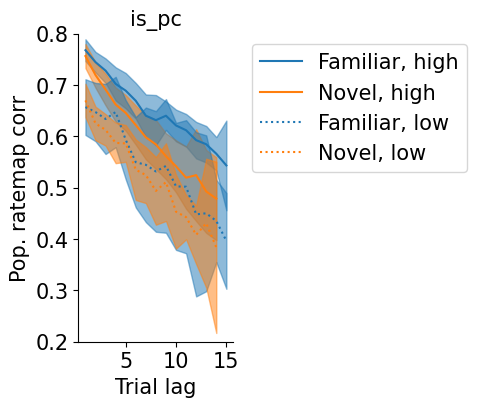

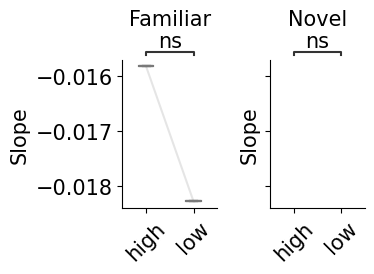

In [135]:
# si, discrete
# key = 'si'
key = 'is_pc'
thresh=0.5#1.#0.4#0.5
q=None
do_equal_sample=False
metrics_agg_tt= per_neuron_metrics_all.groupby(level=(0,1,2,4)).max()

exclude_sess_ma = fr_map_trial_df_all.index.get_level_values(1)==subdb['sess_name'][8]
# exclude_sess_ma = None
df_d,ind_d = pvca.divide_category_by_quantile(fr_map_trial_df_all,metrics_agg_tt,key,thresh=thresh,q=q,do_equal_sample=do_equal_sample,exclude_sess_ma=exclude_sess_ma)

pv_corr_per_lag_d = pvca.get_pv_corr_per_lag_all_category(df_d,pv_level=(1,2,3,4))
fig,ax=pvca.plot_pv_corr_vs_lag_line(pv_corr_per_lag_d,key=key,dosave=False,figdir='./')
ax.set_ylim([0.2,0.8])

slope_per_sess_d = pvca.get_decay_slope_per_sess(pv_corr_per_lag_d,kind='linregress')
fig,axs=pvca.plot_slope_per_sess(slope_per_sess_d,fig=None,axs=None,dosave=False,key=key,figdir='./')


In [138]:
df=slope_per_sess_d.loc[(slice(None),slice(None),1),:]
df=df.set_index('category',append=True).unstack('category')['slope']
df.columns.name=''
ph.paired_line_with_box(df,'high','low',fig=fig,ax=ax,dotest=True)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

high vs. low: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=0.000e+00


(<Figure size 400x300 with 2 Axes>,
 <Axes: title={'center': 'is_pc'}, ylabel='value'>)

<Figure size 640x480 with 0 Axes>

### sw vs nonsw

In [8]:
import pv_corr_analysis as pvca
reload(pvca)

<module 'pv_corr_analysis' from '/mnt/home/szheng/projects/place_variability/code/pv_corr_analysis.py'>

In [12]:
metrics_agg_tt= per_field_metrics_all.groupby(level=(0,1,2,4)).max()
exclude_sess_ma = None

In [73]:
df_d['high'].loc[(slice(None),slice(None),1),:].index.get_level_values(1).unique()

Index(['e13_26m1_211019', 'e13_26m1_211116', 'e13_26m1_211119',
       'e15_13f1_220118', 'e15_13f1_220119', 'e15_13f1_220120',
       'e16_3m2_211212', 'e16_3m2_211213'],
      dtype='object')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

high vs. low: Wilcoxon test (paired samples), P_val:2.501e-12 Stat=1.300e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

high vs. low: Wilcoxon test (paired samples), P_val:1.562e-02 Stat=1.000e+00


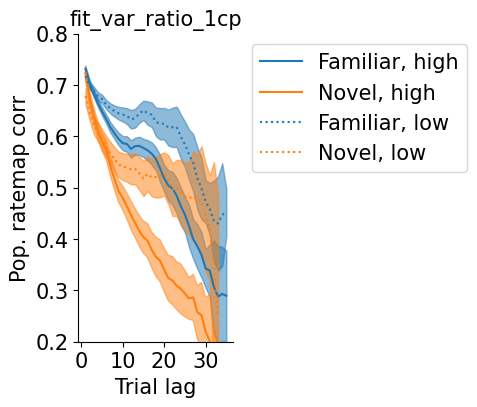

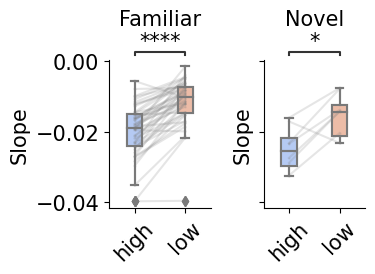

In [73]:
# fit_var_ratio, continuous
key = 'fit_var_ratio_1cp'#'resid2_mean_norm'#'fit_var_ratio'
thresh=None
q=0.5
do_equal_sample=False
dosave = False#True
# metrics_agg_tt= per_neuron_metrics_all.groupby(level=(0,1,2,4)).max()
metrics_agg_tt= per_field_metrics_all.groupby(level=(0,1,2,4)).max()

# exclude_sess_ma = fr_map_trial_df_all.index.get_level_values(1)==subdb['sess_name'][8]
exclude_sess_ma = None
df_d,ind_d = pvca.divide_category_by_quantile(fr_map_trial_df_all,metrics_agg_tt,key,thresh=thresh,q=q,do_equal_sample=do_equal_sample,exclude_sess_ma=exclude_sess_ma)

pv_corr_per_lag_d = pvca.get_pv_corr_per_lag_all_category(df_d,pv_level=(1,2,3,4))
fig,ax=pvca.plot_pv_corr_vs_lag_line(pv_corr_per_lag_d,key=key,dosave=dosave,figdir=figdir)
ax.set_ylim([0.2,0.8])

slope_per_sess_d = pvca.get_decay_slope_per_sess(pv_corr_per_lag_d,kind='linregress')
fig,axs=pvca.plot_slope_per_sess(slope_per_sess_d,fig=None,axs=None,dosave=dosave,key=key,figdir=figdir)


In [101]:
reload(ph)
reload(pvca)

<module 'pv_corr_analysis' from '/mnt/home/szheng/projects/place_variability/code/pv_corr_analysis.py'>

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

high vs. low: Wilcoxon test (paired samples), P_val:1.523e-11 Stat=2.200e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

high vs. low: Wilcoxon test (paired samples), P_val:7.812e-03 Stat=0.000e+00


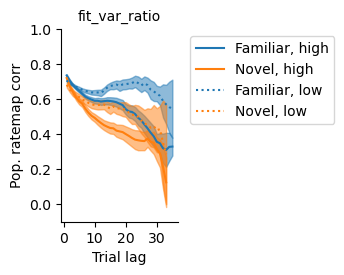

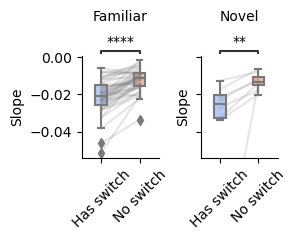

In [119]:
# switch, discrete; using fit_var ratio with a low thresh
reload(pvca)
dosave = True
key = 'fit_var_ratio'
thresh = 0.001
nrepeats = 10
pv_corr_per_lag_d_l = pvca.get_pv_corr_per_lag_all_category_multisample_wrapper(fr_map_trial_df_all,metrics_agg_tt,key,nrepeats=nrepeats,thresh=thresh,exclude_sess_ma=exclude_sess_ma)        
pv_corr_per_lag_d = pv_corr_per_lag_d_l

fig,ax=pvca.plot_pv_corr_vs_lag_line(pv_corr_per_lag_d,key=key,dosave=dosave,figdir=figdir,figsize=(1.5,2.5))
# ax.set_ylim([0.2,0.8])

slope_per_sess_d = pvca.get_decay_slope_per_sess(pv_corr_per_lag_d,kind='linregress')
fig,axs=pvca.plot_slope_per_sess(slope_per_sess_d,fig=None,axs=None,dosave=dosave,key=key,figdir=figdir,figsize=(3,2.5))




In [105]:
slope_per_sess_d.set_index('category',append=True).groupby(level=(2,3)).count()

slope
  category       
0 high         46
  low          46
1 high          8
  low           8

In [106]:
diff=slope_per_sess_d.set_index('category',append=True).unstack('category').diff(axis=1)
diff.groupby(level=2).median()

slope          
category  high       low
0          NaN  0.009105
1          NaN  0.011282

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

high vs. low: Wilcoxon test (paired samples), P_val:1.668e-01 Stat=4.130e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

high vs. low: Wilcoxon test (paired samples), P_val:1.953e-01 Stat=8.000e+00


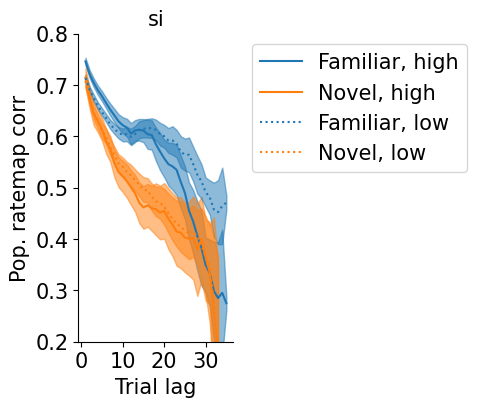

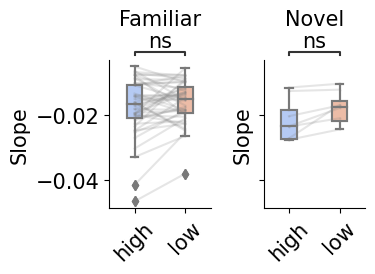

In [75]:
# si, continuous
key = 'si'#'resid2_mean_norm'#'fit_var_ratio'
thresh=None
q=0.5
do_equal_sample=False
dosave = True
metrics_agg_tt= per_neuron_metrics_all.groupby(level=(0,1,2,4)).max()
# metrics_agg_tt= per_field_metrics_all.groupby(level=(0,1,2,4)).max()

# exclude_sess_ma = fr_map_trial_df_all.index.get_level_values(1)==subdb['sess_name'][8]
exclude_sess_ma = None
df_d,ind_d = pvca.divide_category_by_quantile(fr_map_trial_df_all,metrics_agg_tt,key,thresh=thresh,q=q,do_equal_sample=do_equal_sample,exclude_sess_ma=exclude_sess_ma)

pv_corr_per_lag_d = pvca.get_pv_corr_per_lag_all_category(df_d,pv_level=(1,2,3,4))
fig,ax=pvca.plot_pv_corr_vs_lag_line(pv_corr_per_lag_d,key=key,dosave=dosave,figdir=figdir)
ax.set_ylim([0.2,0.8])

slope_per_sess_d = pvca.get_decay_slope_per_sess(pv_corr_per_lag_d,kind='linregress')
fig,axs=pvca.plot_slope_per_sess(slope_per_sess_d,fig=None,axs=None,dosave=dosave,key=key,figdir=figdir)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

high vs. low: Wilcoxon test (paired samples), P_val:8.433e-02 Stat=3.820e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

high vs. low: Wilcoxon test (paired samples), P_val:7.812e-03 Stat=0.000e+00


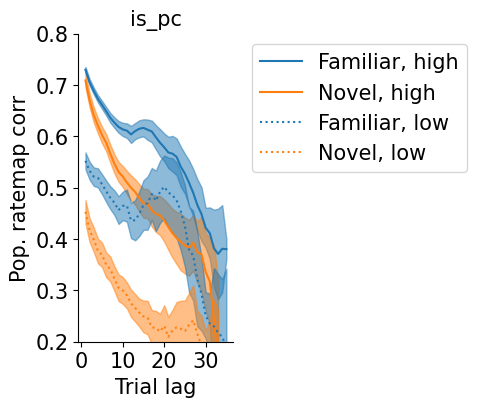

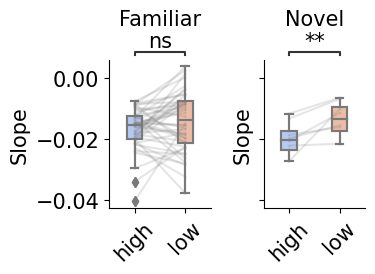

In [76]:
# is place cell, discrete; 
reload(pvca)
dosave = True
key = 'is_pc'
thresh = 0.5
nrepeats = 10
metrics_agg_tt= per_neuron_metrics_all.groupby(level=(0,1,2,4)).max()
# metrics_agg_tt= per_field_metrics_all.groupby(level=(0,1,2,4)).max()
pv_corr_per_lag_d_l = pvca.get_pv_corr_per_lag_all_category_multisample_wrapper(fr_map_trial_df_all,metrics_agg_tt,key,nrepeats=nrepeats,thresh=thresh,exclude_sess_ma=exclude_sess_ma)        
pv_corr_per_lag_d = pv_corr_per_lag_d_l

fig,ax=pvca.plot_pv_corr_vs_lag_line(pv_corr_per_lag_d,key=key,dosave=dosave,figdir=figdir)
ax.set_ylim([0.2,0.8])

slope_per_sess_d = pvca.get_decay_slope_per_sess(pv_corr_per_lag_d,kind='linregress')
fig,axs=pvca.plot_slope_per_sess(slope_per_sess_d,fig=None,axs=None,dosave=dosave,key=key,figdir=figdir)



In [18]:
slope_per_sess_d_unstack=slope_per_sess_d.set_index('category',append=True).unstack(level=-1)

In [25]:
xx=slope_per_sess_d_unstack.loc[(slice(None),slice(None),1),:].diff(axis=1).iloc[:,1]
scipy.stats.wilcoxon(xx)

WilcoxonResult(statistic=0.0, pvalue=0.0078125)

In [27]:
xx.mean()/xx.std()

0.8544328033512208

In [11]:
gpb=fr_map_trial_df_all.groupby(level=2)
nsess_per_trial = {}
for k,val in gpb:
    nsess=val.groupby(level=(0,1,2,3)).apply(lambda x:x.notna().any(axis=0)).sum(axis=0)
    nsess_per_trial[k] = nsess
nsess_per_trial = pd.concat(nsess_per_trial)

In [12]:
nsess_per_trial.unstack().T

,0,1
0,92,16
1,92,16
2,92,16
3,92,16
4,92,16
5,92,14
6,92,14
7,90,14
8,89,14
9,81,14


# contribution to one correlation

In [271]:
subdb['sess_name']

animal_name   
e13_26m1     0    e13_26m1_210913
e15_13f1     0    e15_13f1_220117
             1    e15_13f1_220118
             2    e15_13f1_220119
             3    e15_13f1_220120
e13_26m1     1    e13_26m1_211019
e13_16f1     7    e13_16f1_210328
e13_26m1     2    e13_26m1_211116
e16_3m2      3     e16_3m2_211213
             2     e16_3m2_211212
e16_3m1      3     e16_3m1_210203
e16_3m2      0     e16_3m2_211210
e13_26m1     3    e13_26m1_211119
             4    e13_26m1_211124
e16_3m1      2     e16_3m1_210201
e13_16f1     8    e13_16f1_210331
e16_3m1      1     e16_3m1_210119
e13_16f1     0    e13_16f1_210302
             4    e13_16f1_210317
             1    e13_16f1_210312
e15_10m1     5    e15_10m1_200809
             6    e15_10m1_200812
e13_16f1     2    e13_16f1_210314
e15_9f1      4     e15_9f1_200729
e14_2m2      2     e14_2m2_201019
e13_16f1     5    e13_16f1_210319
             6    e13_16f1_210322
e15_10m1     3    e15_10m1_200727
e14_2m2      1     e14_2m2_201017

In [272]:
ani = 'e15_13f1'
sess='e15_13f1_220117'
val = fr_map_trial_df_all.loc[(ani,sess,0,0),:].dropna(axis=1)

/tmp/ipykernel_2133978/829589694.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  val = fr_map_trial_df_all.loc[(ani,sess,0,0),:].dropna(axis=1)


In [36]:
reload(pvca)

<module 'pv_corr_analysis' from '/mnt/home/szheng/projects/place_variability/code/pv_corr_analysis.py'>

In [37]:
%%time 
gpb = fr_map_trial_df_all.groupby(level=(0,1,2,3),sort=False)
contribution_per_cell_per_tr_pair_all = {}
for k,val in gpb:
    contribution_per_cell_per_tr_pair = pvca.get_contribution_per_cell_per_tr_pair_onesess(val.loc[k])
    contribution_per_cell_per_tr_pair_all[k] = contribution_per_cell_per_tr_pair
contribution_per_cell_per_tr_pair_all = pd.concat(contribution_per_cell_per_tr_pair_all,axis=0)
contribution_per_cell_per_lag_all = contribution_per_cell_per_tr_pair_all.groupby(level=0,axis=1).mean()

CPU times: user 27.7 s, sys: 132 ms, total: 27.8 s
Wall time: 27.8 s


In [38]:
# recombine metrics to get rid of both: i.e. when taking the max, considering both in both trial types
metrics_agg_tt={}
for tt in [0,1]:
    metrics_agg_one_tt = per_field_metrics_all.loc[(slice(None),slice(None),slice(None),[tt,'both']),:].groupby(level=(0,1,2,4)).max()
    metrics_agg_tt[tt]=metrics_agg_one_tt
metrics_agg_tt = pd.concat(metrics_agg_tt,axis=0)
metrics_agg_tt = metrics_agg_tt.reorder_levels((1,2,3,0,4))

sl_intercept_all = pvca.get_slope_intercept_per_neuron(contribution_per_cell_per_tr_pair_all)

metrics_agg_tt_with_sl_intercept = metrics_agg_tt.join(sl_intercept_all)

metrics_agg_tt_with_sl_intercept['has_sw'] = metrics_agg_tt_with_sl_intercept['fit_var_ratio'] > 0.001 # define the categorization for switching

In [39]:

gpb = metrics_agg_tt_with_sl_intercept.groupby(level=(0,1,2,3))
decay_metrics_median_all = {}
for k,val in gpb:
    decay_metrics_median_per_sess=val.groupby('has_sw')[['slope','intercept']].median()
    decay_metrics_median_all[k] = decay_metrics_median_per_sess.unstack()
decay_metrics_median_all = pd.concat(decay_metrics_median_all,axis=1).T

decay_metrics_median_all=decay_metrics_median_all.rename({False:'No switch',True:'Has switch'},level=1,axis=1)

In [116]:
decay_metrics_median_all['slope'].diff(axis=1).groupby(level=(2)).count()

has_sw,No switch,Has switch
0,0,92
1,0,16


In [114]:
decay_metrics_median_all['slope'].diff(axis=1).groupby(level=(2)).median()

has_sw,No switch,Has switch
0,NaN,-0.000129
1,NaN,-0.000078


In [115]:
decay_metrics_median_all['intercept'].diff(axis=1).groupby(level=(2)).median()

has_sw,No switch,Has switch
0,NaN,0.002478
1,NaN,0.001236


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No switch vs. Has switch: Wilcoxon test (paired samples), P_val:9.206e-16 Stat=7.500e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No switch vs. Has switch: Wilcoxon test (paired samples), P_val:3.052e-05 Stat=0.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No switch vs. Has switch: Wilcoxon test (paired samples), P_val:3.811e-13 Stat=2.740e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No switch

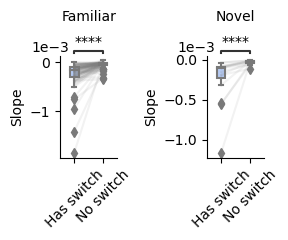

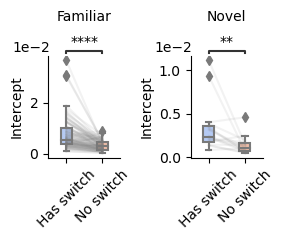

In [129]:
# per session
dosave = True #False
xticklabel_map={'high':'Has switch','low':'No switch'}
for key in decay_metrics_median_all.columns.get_level_values(0).unique():
    fig,axs = plt.subplots(1,2,figsize=(3,2.5))
#     fig,axs = plt.subplots(1,2,figsize=(3,2))
    for ii,isnovel in enumerate([0,1]):
        ax=axs[ii]
        isnovel_str = ['Familiar','Novel'][isnovel]
        df= decay_metrics_median_all[key].loc[(slice(None),slice(None),isnovel),:]
        fig,ax=ph.paired_line_with_box(df,'Has switch','No switch',fig=fig,ax=ax,dotest=True,alpha=0.1)
        ax.set_xlabel('')
        key_cap = key[0].upper() + key[1:]
        ax.set_ylabel(key_cap)
        ax.set_title(isnovel_str,pad=25)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        offset_text = ax.yaxis.get_offset_text()
        offset_text.set_position((-0.5,1.1))
        xticklabels=[xticklabel_map['high'],xticklabel_map['low']]
        ax.set_xticklabels(xticklabels,rotation=45)
    plt.tight_layout()
    figfn = f'{key}_contribution_to_pvcorr_vs_sw_median_across_neuron_per_sess'
    if dosave:
        ph.save_given_name(fig,figfn,figdir)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No switch vs. Has switch: Wilcoxon test (paired samples), P_val:8.107e-16 Stat=7.100e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No switch vs. Has switch: Wilcoxon test (paired samples), P_val:3.597e-13 Stat=2.720e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No switch vs. Has switch: Wilcoxon test (paired samples), P_val:3.052e-05 Stat=0.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No switch

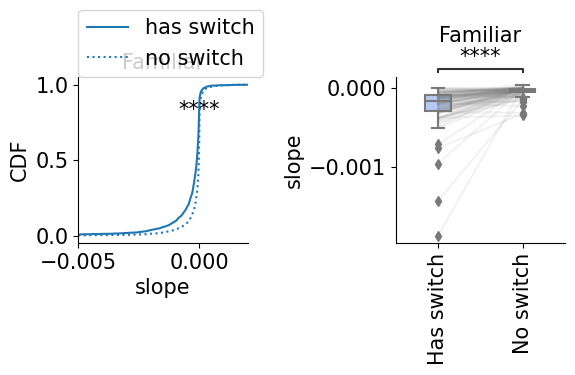

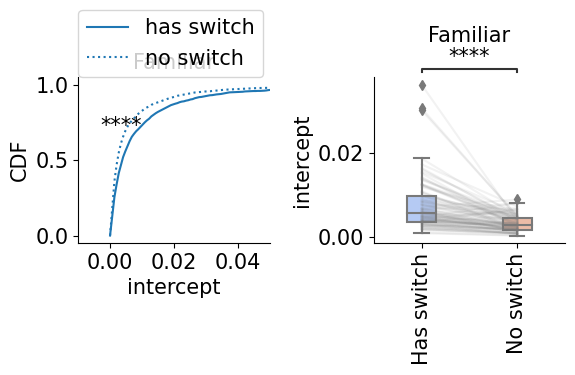

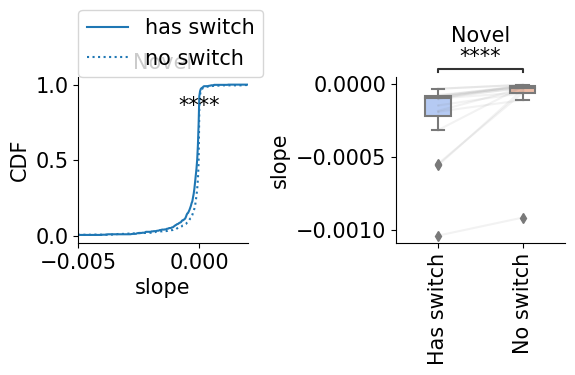

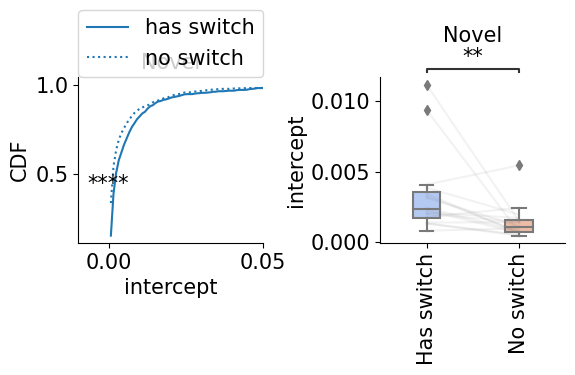

In [50]:
# both cdf and per session 
reload(ph)
# categorize
metrics_agg_tt_with_sl_intercept['has_sw'] = metrics_agg_tt_with_sl_intercept['fit_var_ratio'] > 0.001
gpb = metrics_agg_tt_with_sl_intercept.groupby(level=2)
xlim_d = {'slope':[-0.005,0.002],'intercept':[-0.01,0.05]}
dosave=True
for isnovel,val in gpb:
    isnovel_str = ['Familiar','Novel'][isnovel]
    for key in ['slope','intercept']:
        fig,axs=plt.subplots(1,2,figsize=(6,4))
        ax=axs[0]
        ph.plot_cdf_and_ks_test(val.query('has_sw')[key],val.query('~has_sw')[key],
                                label1='has switch',label2='no switch',xlabel=key,title=isnovel_str,
                                c_l = ['C0','C0'],
                                linestyle_l=['-',':'],
                                alternative='two-sided',
                                fig=fig,ax=ax,do_legend=False
                           )
        ax.set_xlim(xlim_d[key])
        ax.legend(loc=[0,1])

        
        figfn = f'cdf_ks_{key}_of_contribution_vs_sw_{isnovel_str}'
        
        ax=axs[1]
        df= decay_metrics_median_all[key].loc[(slice(None),slice(None),isnovel),:]
        fig,ax=ph.paired_line_with_box(df,'Has switch','No switch',fig=fig,ax=ax,dotest=True,alpha=0.1,rotation=90)
        ax.set_xlabel('')
        ax.set_ylabel(key)
        ax.set_title(isnovel_str,pad=25)
        plt.tight_layout()
        
        
        if dosave:
            ph.save_given_name(fig,figfn,figdir)





# schematics for contribution analysis

In [54]:
ani = 'e15_13f1'
sess='e15_13f1_220117'
sl_all = metrics_agg_tt_with_sl_intercept.loc[(ani,sess,0,0),'slope']

/tmp/ipykernel_635120/680542698.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  sl_all = metrics_agg_tt_with_sl_intercept.loc[(ani,sess,0,0),'slope']


In [60]:
contribution_per_cell_per_lag=contribution_per_cell_per_lag_all.loc[(ani,sess,0,0),:].dropna(axis=1)

/tmp/ipykernel_635120/1697443920.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  contribution_per_cell_per_lag=contribution_per_cell_per_lag_all.loc[(ani,sess,0,0),:].dropna(axis=1)


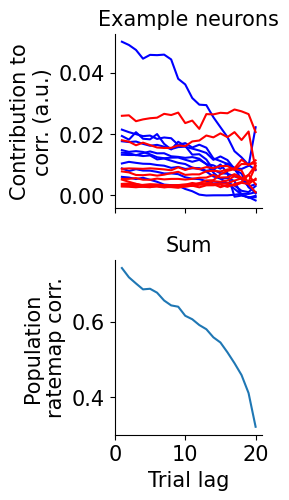

In [65]:
from matplotlib.ticker import MaxNLocator
dosave=True
nex = 10
fig,axs=plt.subplots(2,1,figsize=(3,5),sharex=True)
ax=axs[0]
inds = sl_all.sort_values().iloc[:nex].index
contribution_per_cell_per_lag.loc[inds].T.plot(ax=ax,c='blue',legend=False)
ax.set_title('Example neurons')
inds = sl_all.sort_values().iloc[-nex:].index
contribution_per_cell_per_lag.loc[inds].T.plot(ax=ax,c='red',legend=False)

ax.set(xlabel='Trial lag',ylabel='Contribution to\ncorr. (a.u.)')
ax=axs[1]
contribution_per_cell_per_lag.sum(axis=0).plot(ax=ax)
ax.set_xticks(range(0,21,10))
ax.set_title('Sum')
ax.set_ylabel('Population\nratemap corr.')
sns.despine()
plt.tight_layout()

ax.set_xlabel('Trial lag')

figfn = 'contribution_schematics'
if dosave:
    ph.save_given_name(fig,figfn,figdir)


### per session 

In [426]:
gpb = metrics_agg_tt_with_sl_intercept.groupby(level=(0,1,2,3))
decay_metrics_median_all = {}
for k,val in gpb:
    decay_metrics_median_per_sess=val.groupby('has_sw')[['slope','intercept']].median()
    decay_metrics_median_all[k] = decay_metrics_median_per_sess.unstack()
decay_metrics_median_all = pd.concat(decay_metrics_median_all,axis=1).T

decay_metrics_median_all=decay_metrics_median_all.rename({False:'No switch',True:'Has switch'},level=1,axis=1)

Index(['slope', 'intercept'], dtype='object')

In [441]:
df.iloc[0][]

has_sw
No switch     0.002456
Has switch    0.005999
Name: (e13_16f1, e13_16f1_210302, 0, 0), dtype: float64

In [445]:
reload(ph)

<module 'plot_helper' from '/mnt/home/szheng/projects/util_code/plot_helper.py'>

In [450]:
df

has_sw                        No switch  Has switch
e13_16f1 e13_16f1_210302 0 0   0.002456    0.005999
                           1   0.002476    0.003791
         e13_16f1_210312 0 0   0.002257    0.006897
                           1   0.002478    0.015209
         e13_16f1_210314 0 0   0.002098    0.009856
...                                 ...         ...
e16_3m2  e16_3m2_211212  1 1   0.001978    0.003880
         e16_3m2_211213  0 0   0.002508    0.003638
                           1   0.001956    0.002553
                         1 0   0.001167    0.003169
                           1   0.001739    0.002114

[108 rows x 2 columns]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No switch vs. Has switch: Wilcoxon test (paired samples), P_val:8.107e-16 Stat=7.100e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No switch vs. Has switch: Wilcoxon test (paired samples), P_val:3.052e-05 Stat=0.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No switch vs. Has switch: Wilcoxon test (paired samples), P_val:3.597e-13 Stat=2.720e+02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No switch

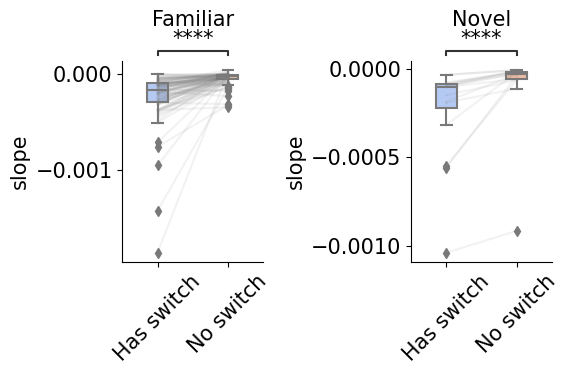

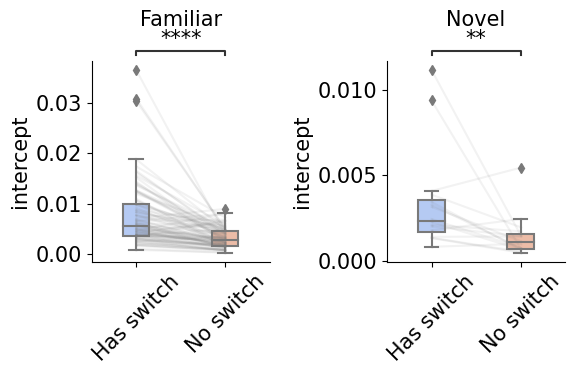

In [457]:
for key in decay_metrics_median_all.columns.get_level_values(0).unique():
    fig,axs = plt.subplots(1,2,figsize=(6,4))
    for ii,isnovel in enumerate([0,1]):
        ax=axs[ii]
        isnovel_str = ['Familiar','Novel'][isnovel]
        df= decay_metrics_median_all[key].loc[(slice(None),slice(None),isnovel),:]
        fig,ax=ph.paired_line_with_box(df,'Has switch','No switch',fig=fig,ax=ax,dotest=True,alpha=0.1)
        ax.set_xlabel('')
        ax.set_ylabel(key)
        ax.set_title(isnovel_str,pad=25)
    plt.tight_layout()
    figfn = f'{key}_contribution_to_pvcorr_vs_sw_median_across_neuron_per_sess'
    ph.save_given_name(fig,figfn,figdir)

In [273]:
val_z = scipy.stats.zscore(val,axis=0)
# val_z = scipy.stats.zscore(val_mat,axis=0)
contribution_per_cell_per_tr_pair = {}
tr_lag_max = val_z.columns.max() - val_z.columns.min()
for tr_lag in range(1,tr_lag_max+1):
    for tr_st in range(0,val_z.columns.max()-tr_lag+1): 
#         z_prod_tr_pair = val_z[:,tr1] * val_z[:,tr2]
        z_prod_tr_pair = val_z[tr_st] * val_z[tr_st + tr_lag]
        contribution_per_cell=z_prod_tr_pair.unstack().sum(axis=1) / len(z_prod_tr_pair)
        contribution_per_cell_per_tr_pair[tr_lag,tr_st] = contribution_per_cell
contribution_per_cell_per_tr_pair = pd.concat(contribution_per_cell_per_tr_pair,axis=1)
contribution_per_cell_per_lag = contribution_per_cell_per_tr_pair.groupby(level=0,axis=1).mean()     
        

In [276]:
metrics_agg_tt= per_field_metrics_all.groupby(level=(0,1,2,4)).max()
metrics_agg_tt_one = metrics_agg_tt.loc[(ani,sess,0),:]

In [277]:
sl_all = {}
intercept_all = {}
# for uid,row in contribution_per_cell_per_lag.iterrows():
for uid,row in contribution_per_cell_per_tr_pair.iterrows():
#     reg_res = scipy.stats.linregress(row.index,row.values)
    reg_res = scipy.stats.linregress(row.index.get_level_values(0),row.values)
    sl = reg_res[0]
    intercept = reg_res[1]
    sl_all[uid] = sl
    intercept_all[uid] = intercept
sl_all = pd.Series(sl_all)
intercept_all = pd.Series(intercept_all)

In [278]:
ind=sl_all.index.intersection(metrics_agg_tt_one.index)
metrics_agg_tt_one['slope'] = sl_all.loc[ind]
metrics_agg_tt_one['intercept'] = intercept_all.loc[ind]

/tmp/ipykernel_2133978/4226712302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_agg_tt_one['slope'] = sl_all.loc[ind]
/tmp/ipykernel_2133978/4226712302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_agg_tt_one['intercept'] = intercept_all.loc[ind]


In [298]:
reload(ph)

<module 'plot_helper' from '/mnt/home/szheng/projects/util_code/plot_helper.py'>

/tmp/ipykernel_2133978/686524430.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  fr_map_trial=fr_map_trial_df_all.loc[(ani,sess,0,0),:].loc[uid]
/mnt/home/szheng/projects/util_code/plot_helper.py:562: UserWarning: FixedFormatter should only be used together with FixedLocator
  


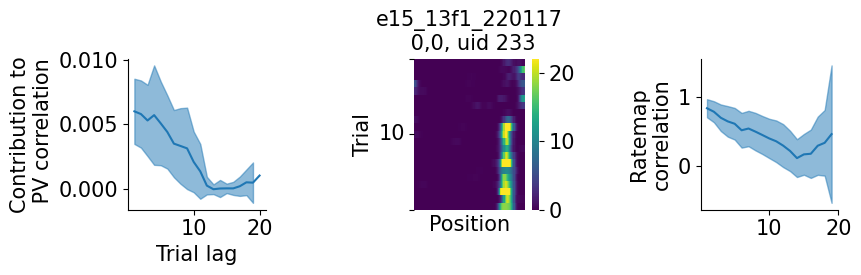

In [326]:
reload(pvca)
dosave=False

ii=6
uid=int(sl_all.sort_values().iloc[:nex].index[ii])
fr_map_trial=fr_map_trial_df_all.loc[(ani,sess,0,0),:].loc[uid]
contribution_one_cell = contribution_per_cell_per_tr_pair.loc[uid].unstack(level=0)
ti = 0
tt = 0

fig,axs=pvca.visualize_example_contribution(contribution_one_cell,fr_map_trial,
                                   sess=sess,ti=ti,tt=tt,uid=uid,dosave=dosave,
                                   figdir=figdir)

In [329]:
contribution_per_cell_per_lag

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
31.0,0.005040,0.004827,0.004952,0.004669,0.004400,0.004413,0.003966,0.004350,0.004752,0.004481,0.004497,0.004786,0.004749,0.004897,0.005531,0.005083,0.004604,0.005822,0.006637,0.000891
32.0,0.013248,0.013152,0.013161,0.012812,0.013008,0.011719,0.012008,0.011304,0.010599,0.010213,0.009066,0.008616,0.007725,0.006158,0.005462,0.003890,0.002090,0.000248,-0.000785,-0.000141
33.0,0.000305,0.000293,0.000298,0.000285,0.000281,0.000288,0.000298,0.000264,0.000314,0.000373,0.000287,0.000318,0.000269,0.000298,0.000247,0.000302,0.000327,0.000334,0.000337,0.000356
34.0,0.000410,0.000301,0.000375,0.000528,0.000516,0.000406,0.000337,0.000325,0.000292,0.000385,0.000515,0.000483,0.000390,0.000257,0.000550,0.000411,0.000327,0.000226,0.000944,0.000009
35.0,0.014746,0.014176,0.014417,0.014154,0.013389,0.012420,0.012101,0.012292,0.012329,0.011613,0.010947,0.011585,0.010236,0.007399,0.005449,0.005647,0.004655,0.000124,-0.000676,-0.000609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372.0,0.000408,0.000406,0.000406,0.000408,0.000407,0.000405,0.000402,0.000405,0.000406,0.000407,0.000410,0.000411,0.000413,0.000420,0.000415,0.000411,0.000413,0.000420,0.000423,0.000410
373.0,0.000362,0.000296,0.000322,0.000334,0.000338,0.000338,0.000333,0.000314,0.000320,0.000327,0.000346,0.000332,0.000312,0.000362,0.000323,0.000278,0.000321,0.000352,0.000383,0.000398
374.0,0.004434,0.004462,0.004531,0.004819,0.004831,0.004772,0.004116,0.004245,0.004619,0.004060,0.004006,0.003700,0.004080,0.003311,0.003157,0.002146,0.002147,0.002010,0.002962,-0.000545
375.0,0.000361,0.000360,0.000343,0.000331,0.000339,0.000342,0.000326,0.000327,0.000338,0.000327,0.000362,0.000344,0.000350,0.000364,0.000363,0.000375,0.000414,0.000418,0.000422,0.000445


# schematics for contribution analysis

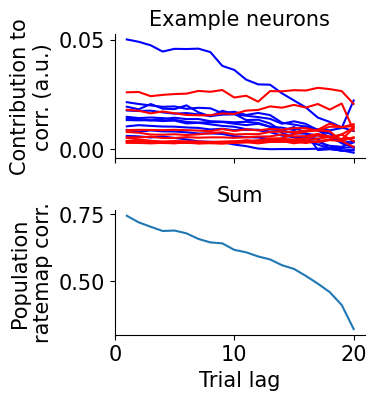

In [344]:
from matplotlib.ticker import MaxNLocator
nex = 10
fig,axs=plt.subplots(2,1,figsize=(4,4),sharex=True)
ax=axs[0]
inds = sl_all.sort_values().iloc[:nex].index
contribution_per_cell_per_lag.loc[inds].T.plot(ax=ax,c='blue',legend=False)
ax.set_title('Example neurons')
inds = sl_all.sort_values().iloc[-nex:].index
contribution_per_cell_per_lag.loc[inds].T.plot(ax=ax,c='red',legend=False)

ax.set(xlabel='Trial lag',ylabel='Contribution to\ncorr. (a.u.)')
ax=axs[1]
contribution_per_cell_per_lag.sum(axis=0).plot(ax=ax)
ax.set_xticks(range(0,21,10))
ax.set_title('Sum')
ax.set_ylabel('Population\nratemap corr.')
sns.despine()
plt.tight_layout()

ax.set_xlabel('Trial lag')

figfn = 'contribution_schematics'
ph.save_given_name(fig,figfn,figdir)


/tmp/ipykernel_2133978/531841637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_agg_tt_one['has_sw'] = metrics_agg_tt_one['fit_var_ratio'] > 0.001


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'KS Test: p-value = 0.001 *\nstat=0.235'}, xlabel='intercept', ylabel='CDF'>)

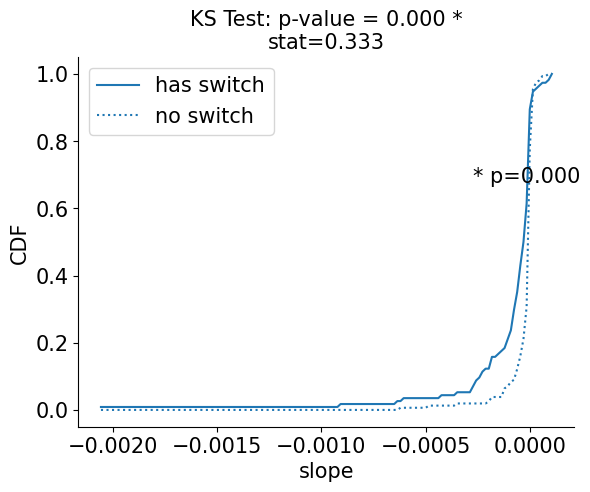

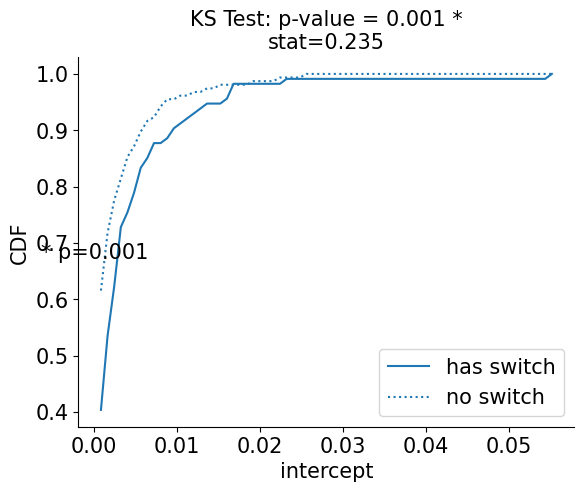

In [346]:
reload(ph)
key = 'slope'

metrics_agg_tt_one['has_sw'] = metrics_agg_tt_one['fit_var_ratio'] > 0.001

ph.plot_cdf_and_ks_test(metrics_agg_tt_one.query('has_sw')[key],metrics_agg_tt_one.query('~has_sw')[key],
                        label1='has switch',label2='no switch',xlabel=key,title=None,
                        c_l = ['C0','C0'],
                        linestyle_l=['-',':'],
                        alternative='two-sided'
                        
                       )

key = 'intercept'
ph.plot_cdf_and_ks_test(metrics_agg_tt_one.query('has_sw')[key],metrics_agg_tt_one.query('~has_sw')[key],
                        label1='has switch',label2='no switch',xlabel=key,title=None,
                        c_l = ['C0','C0'],
                        linestyle_l=['-',':'],
                        alternative='two-sided'
                        
                       )





In [186]:
metrics_agg_tt_one

,frac_trial_active,fr_cv_beh,loc_std,field_width,tot_var,mean,fit_var,resid2_mean,fit_var_ratio,resid2_mean_ratio,...,fit_var_ratio_1cp,fit_var_ratio_div_sh_1cp,log_mean,lap_correlation,si,sparsity,fr_nrem,slope,intercept,has_sw
3,0.918919,0.705983,4.801933,21,11.340485,5.587402,6.993121e+00,4.347364,6.166510e-01,0.508763,...,0.491237,4.825278,1.720514,0.823252,3.372180,3.918471,0.059936,-4.082138e-06,0.000295,True
27,1.000000,0.272969,6.913563,30,54.997992,33.067719,1.262177e-29,54.997992,3.725333e-31,1.000000,...,0.165814,1.640308,3.498558,0.386069,0.026260,1.008588,5.158457,-8.043760e-05,0.071815,False
29,1.000000,0.701315,4.239454,23,56.756622,27.341685,1.093515e+01,56.756622,6.244721e-01,1.000000,...,0.453326,4.448850,3.308412,0.782023,0.984662,1.228086,1.581516,-3.054123e-04,0.014449,True
30,1.000000,0.874062,4.248217,19,27.955915,10.243519,3.155444e-30,27.955915,2.507680e-31,1.000000,...,0.176757,1.916060,2.326645,0.490717,0.705295,2.118431,1.856489,-2.359339e-05,0.001224,False
31,0.939394,0.861568,3.059387,17,16.009946,9.241263,8.665910e+00,7.344036,5.412829e-01,1.000000,...,0.541283,5.356884,2.223679,0.820701,2.039583,11.216520,2.357023,-3.673957e-05,0.001175,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0.378378,0.600052,2.420508,10,1.126938,1.793539,4.930381e-32,1.126938,5.666255e-32,1.000000,...,0.135720,1.535721,0.584191,0.549886,0.891028,3.831881,0.076712,9.458719e-08,0.000282,False
475,0.787879,0.952650,6.000751,22,120.581095,11.875931,8.568771e+01,34.893387,7.106231e-01,0.353442,...,0.710623,7.761664,2.474514,0.906775,3.117050,3.274267,0.076712,-2.506468e-05,0.000736,True
476,0.378378,4.238614,6.730773,19,67.030932,5.058096,6.014767e+01,9.527370,8.973121e-01,1.000000,...,0.550135,6.359236,1.620990,0.126967,1.995012,1.911750,0.098063,-8.671310e-06,0.000297,True
479,0.297297,4.260241,1.257410,5,33.230253,3.184682,2.970952e+01,3.520728,8.940505e-01,0.591998,...,0.474204,5.304212,1.158352,-0.056217,1.403254,8.612462,0.317981,-2.742365e-06,0.000256,True


(-0.0001, 0.0001)

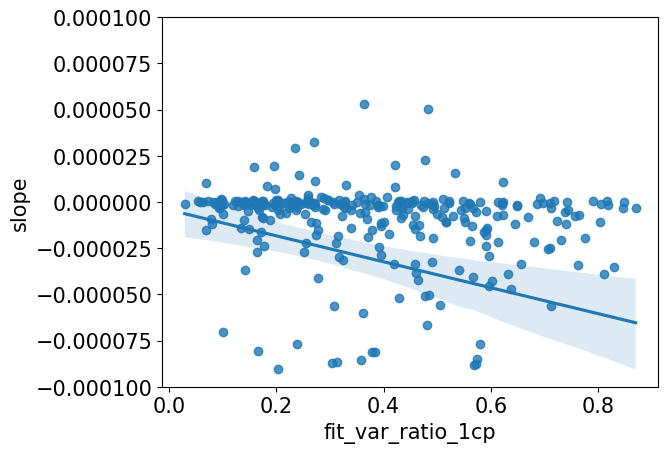

In [169]:
ax=sns.regplot(data=metrics_agg_tt_one,x='fit_var_ratio_1cp',y='slope')
ax.set_ylim([-0.0001,0.0001])

<Axes: xlabel='fit_var_ratio_1cp', ylabel='intercept'>

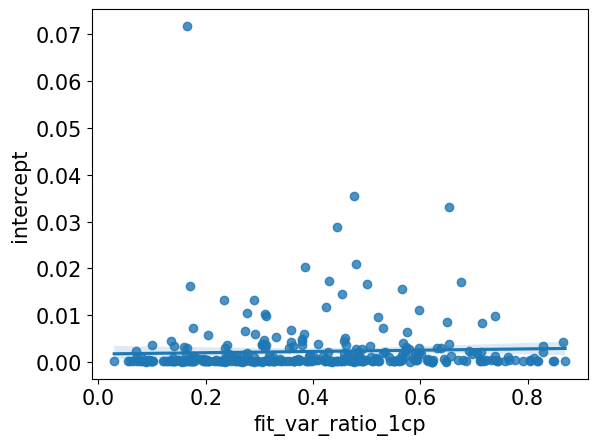

In [168]:
sns.regplot(data=metrics_agg_tt_one,x='fit_var_ratio_1cp',y='intercept')

In [158]:
sl_all

1.0      1.327266e-07
2.0      2.742443e-07
3.0     -4.082138e-06
27.0    -8.043760e-05
29.0    -3.054123e-04
             ...     
476.0   -8.671310e-06
477.0    3.534841e-07
478.0   -6.348131e-07
479.0   -2.742365e-06
480.0    5.021457e-05
Length: 422, dtype: float64

In [149]:
scipy.stats.linregress(row.index,row.values)

LinregressResult(slope=5.021456842591335e-05, intercept=0.001422751785609016, rvalue=0.6248952088994438, pvalue=0.0001316568593440587, stderr=1.1453834323935062e-05, intercept_stderr=0.00021656532422679003)

In [ ]:
scipy.stats.linregress()

In [146]:
contribution_per_cell_per_lag.T

,1.0,2.0,3.0,27.0,29.0,30.0,31.0,32.0,33.0,34.0,...,471.0,472.0,473.0,474.0,475.0,476.0,477.0,478.0,479.0,480.0
1,0.000283,0.000295,0.000293,0.071251,0.012944,0.001095,0.001028,0.003087,0.002508,0.000443,...,0.000295,0.000294,0.000259,0.000283,0.001068,0.000343,0.000292,0.000270,0.000232,0.002427
2,0.000282,0.000295,0.000274,0.071177,0.012412,0.001013,0.000985,0.003071,0.002467,0.000447,...,0.000295,0.000294,0.000253,0.000282,0.000813,0.000260,0.000292,0.000273,0.000233,0.001961
3,0.000282,0.000294,0.000265,0.071447,0.012230,0.001094,0.000929,0.002926,0.002407,0.000425,...,0.000294,0.000293,0.000249,0.000283,0.000729,0.000271,0.000292,0.000277,0.000243,0.001734
4,0.000283,0.000295,0.000267,0.071555,0.011675,0.001074,0.000921,0.002744,0.002240,0.000389,...,0.000295,0.000294,0.000250,0.000282,0.000526,0.000231,0.000292,0.000272,0.000228,0.001850
5,0.000284,0.000295,0.000267,0.071348,0.011530,0.001077,0.000898,0.002913,0.002339,0.000353,...,0.000295,0.000294,0.000254,0.000285,0.000453,0.000220,0.000292,0.000273,0.000227,0.001779
6,0.000283,0.000296,0.000265,0.071836,0.011495,0.001005,0.000921,0.002906,0.002180,0.000367,...,0.000296,0.000295,0.000253,0.000284,0.000451,0.000206,0.000293,0.000275,0.000224,0.002087
7,0.000283,0.000295,0.000259,0.071082,0.012005,0.001141,0.000982,0.002731,0.002092,0.000327,...,0.000295,0.000294,0.000252,0.000283,0.000474,0.000207,0.000292,0.000274,0.000230,0.002218
8,0.000285,0.000296,0.000267,0.070902,0.012131,0.001008,0.000987,0.002638,0.002228,0.000336,...,0.000296,0.000295,0.000253,0.000285,0.000492,0.000202,0.000292,0.000275,0.000230,0.002045
9,0.000284,0.000296,0.000262,0.071023,0.011969,0.001049,0.000903,0.002548,0.002076,0.000334,...,0.000296,0.000294,0.000252,0.000285,0.000433,0.000210,0.000292,0.000274,0.000229,0.001756
10,0.000283,0.000295,0.000258,0.071573,0.012002,0.001052,0.000859,0.002391,0.002016,0.000353,...,0.000295,0.000294,0.000252,0.000284,0.000429,0.000194,0.000292,0.000273,0.000227,0.001650


In [99]:
z_prod_tr_pair

array([0.10368518, 0.08254119, 0.04595277, ..., 0.22842926, 0.22866149,
       0.22872709])

In [85]:
z_prod_tr_pair = scipy.stats.zscore(val[0]) *scipy.stats.zscore(val[1])

In [90]:
z_prod_tr_pair.mean()

0.6067513648316251

In [93]:
contribution_per_cell=z_prod_tr_pair.unstack().sum(axis=1) / len(z_prod_tr_pair)

In [96]:
contribution_per_cell

e16_3m2  e16_3m2_211213  1  1.0  11.0     0.000356
                                 12.0    -0.000181
                                 13.0     0.020139
                                 14.0     0.024054
                                 16.0     0.000327
                                            ...   
                                 203.0    0.006875
                                 204.0    0.000001
                                 205.0    0.000009
                                 206.0   -0.000362
                                 207.0    0.004233
Length: 163, dtype: float64

# population rate correlation

In [40]:
std_q=pop_rate_vec.std(axis=1).quantile(0.8)

0.7490044486852536

In [406]:
do_zscore=False#True#False# True
eps=1e-10
pop_rate_vec = fr_map_trial_df_all.groupby(level=(0,1,2,3,4)).mean()
if do_zscore:
    std = pop_rate_vec.std(axis=1)
    std_q=std.quantile(0.8)
    std_final = np.maximum(std,std_q)
    pop_rate_vec = (pop_rate_vec - pop_rate_vec.mean(axis=1).values[:,None])/(std_final.values[:,None]+eps)
# pop_rate_vec=fr_map_trial_df_all_highsi.groupby(level=(0,1,2,3,4)).mean()
gpb_sess=pop_rate_vec.groupby(level=(0,1,2,3))

In [230]:
first_second_corr_pv = gpb_sess.apply(first_second_half_corr) 
even_odd_corr_pv = gpb_sess.apply(even_odd_corr)
corr_pv=pd.concat({'even_odd':even_odd_corr_pv,'first_second':first_second_corr_pv},axis=1).dropna(axis=0)

[Text(0, 0.5, 'Population rate corr')]

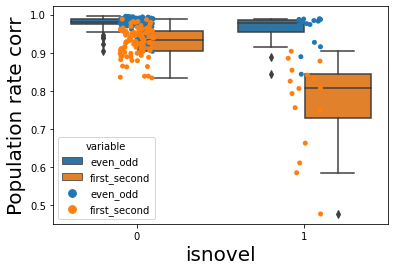

In [231]:
toplot=corr_pv.reset_index(level=2).rename({'level_2':'isnovel',},axis=1).melt(id_vars='isnovel')
fig,ax=plt.subplots()
sns.boxplot(data=toplot,x='isnovel',y='value',hue='variable',ax=ax) # per session
sns.stripplot(data=toplot,x='isnovel',y='value',hue='variable',ax=ax)
# ax.set(ylabel='PV Corr',title='Si > 0.5')
ax.set(ylabel='Population rate corr')


In [407]:
pv_corr_alltrials = gpb_sess.corr()
# pv_corr_alltrials = gpb_sess.apply(dist_one_df)
gpb_corr_sess=pv_corr_alltrials.groupby(level=(0,1,2,3))
pv_corr_per_lag=gpb_corr_sess.apply(get_val_per_lag)

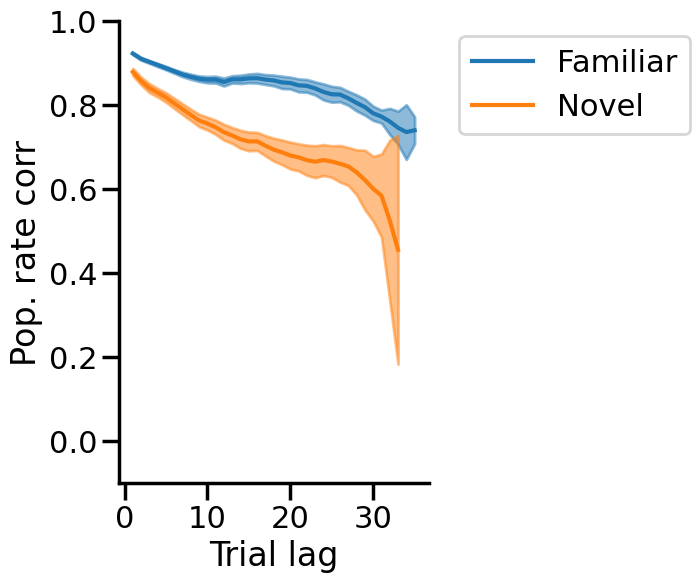

In [408]:
gpb_task=pv_corr_per_lag.groupby(level=(2))
fig,ax=plt.subplots(figsize=(4,6))
isfam_d_str = {0:'Familiar',1:'Novel'}
for k,val in gpb_task:
    fig,ax=ph.mean_error_plot(val,fig=fig,ax=ax,label=isfam_d_str[k],c=f'C{k}')
    ax.set(xlabel='Trial lag',ylabel='Pop. rate corr')
ax.legend(bbox_to_anchor=[1.05,1])
ax.set_ylim([-0.1,1.])
sns.despine()

reload(ph)
figfn = 'pop_rate_corr_vs_triallag'
ph.save_given_name(fig,figfn,figdir=figdir)

# beg end FR difference per neuron

In [48]:
per_neuron_metrics_all = per_field_metrics_all.groupby(level=(0,1,2,3,4)).max()

In [49]:
# ma_ind=per_neuron_metrics_all.query('si>0.5&fit_var_ratio>0.4').index
ma_ind=per_neuron_metrics_all.query('si>0.5').index

# get rid of "both", replace with a copy with 0 and 1
ma_ind_new=[]
for ind in ma_ind:
    if ind[3]=='both':
        ma_ind_new.append((*ind[:3],0,*ind[4:]))
        ma_ind_new.append((*ind[:3],1,*ind[4:]))
    else:
        ma_ind_new.append(ind)
ma_ind_new = pd.MultiIndex.from_tuples(ma_ind_new)

In [382]:
from scipy.spatial.distance import pdist,squareform
from sklearn.metrics.pairwise import nan_euclidean_distances
def dist_one_df(x):
    x=x.dropna(axis=1,how='all')
#     mat=squareform(pdist(x.values.T,metric='sqeuclidean') / x.shape[0])
    mat = nan_euclidean_distances(x.values.T,x.values.T,squared=True) / x.shape[0]
    dist_df=pd.DataFrame(mat,index=x.columns,columns=x.columns)
    return dist_df

def get_plot_pf_param_population_corr_vs_lag(pf_params_all,ma_ind_new=None,pf_key='fr_peak',fig=None,ax=None,center_cell=None,zscore_cell=False,dist='corr'):
    
    df=pf_params_all.loc[(slice(None),slice(None),slice(None),slice(None),pf_key),:].droplevel(4)
    if center_cell is None:
        center_cell = False
        if pf_key=='peak' or pf_key=='com': # by default, no center; if location, then center
            center_cell=True
    if ma_ind_new is not None:
        pf_key_sub=df.reset_index(level=-1).loc[ma_ind_new].set_index('level_5',append='True')
    else:
        pf_key_sub = df
    if center_cell:
        pf_key_sub = pf_key_sub - pf_key_sub.mean(axis=1).values[:,None]
    if zscore_cell:
        pf_key_sub = scipy.stats.zscore(pf_key_sub,axis=1,nan_policy='omit')
#     pdb.set_trace()
    if dist =='corr':
        pf_key_corr_allsess = pf_key_sub.groupby(level=(0,1,2)).corr()
    elif dist=='mse':
        
        pf_key_corr_allsess = pf_key_sub.groupby(level=(0,1,2)).apply(dist_one_df)
#     pdb.set_trace()
    gpb_corr_sess=pf_key_corr_allsess.groupby(level=(0,1,2))
    pv_corr_per_lag=gpb_corr_sess.apply(get_val_per_lag)
    gpb_task=pv_corr_per_lag.groupby(level=(2))
    if ax is None:
        fig,ax=plt.subplots()
    isfam_d_str = {0:'Familiar',1:'Novel'}
    for k,val in gpb_task:
        fig,ax=ph.mean_error_plot(val,fig=fig,ax=ax,label=isfam_d_str[k],c=f'C{k}')
        ax.set(xlabel='Trial lag',ylabel=f'Pop. within-field {pf_key} {dist}')
    ax.legend()
    return fig,ax, pf_key_corr_allsess

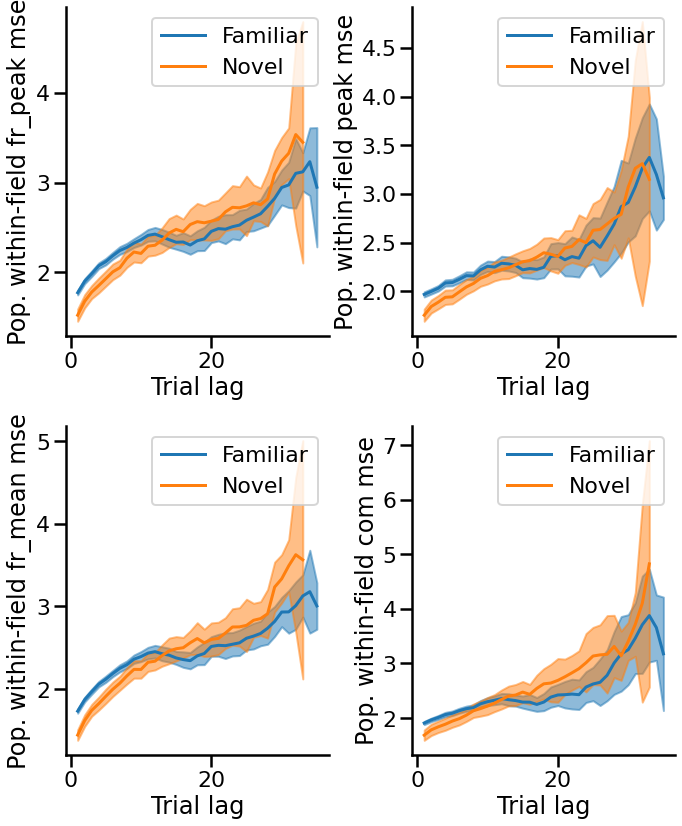

In [387]:
# pf_key = 'fr_peak'
fig,axs=plt.subplots(2,2,figsize=(10,12))
sns.despine()
dist = 'mse'
for ii,pf_key in enumerate(['fr_peak','peak','fr_mean','com']):
    ax=axs.ravel()[ii]
    fig,ax,pf_key_corr_allsess = get_plot_pf_param_population_corr_vs_lag(pf_params_all,ma_ind_new=None,pf_key=pf_key,fig=fig,ax=ax,center_cell=False,zscore_cell=True,dist=dist)
#     fig,ax,pf_key_corr_allsess = get_plot_pf_param_population_corr_vs_lag(pf_params_all,ma_ind_new=None,pf_key=pf_key,fig=fig,ax=ax,center_cell=False,zscore_cell=False,dist='mse')
#     ax.set_ylim([-0.2,1.1])
plt.tight_layout()
for fmt in ['png','svg']:
    fig_fn = f'{dist}_vs_triallag.{fmt}'
    fig.savefig(os.path.join(figdir,fig_fn),bbox_inches='tight')
    

In [421]:
sns.set_context('poster')

In [422]:
plt.rcParams['svg.fonttype']='none'

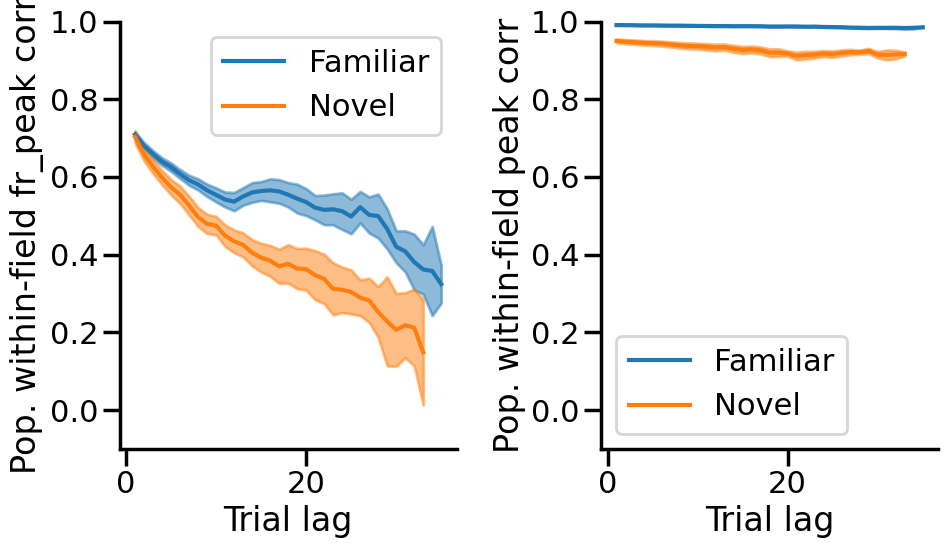

In [425]:
# pf_key = 'fr_peak'
# fig,axs=plt.subplots(2,2,figsize=(10,12))
fig,axs=plt.subplots(1,2,figsize=(10,6))
sns.despine()
dist = 'corr'
# for ii,pf_key in enumerate(['fr_peak','peak','fr_mean','com']):
for ii,pf_key in enumerate(['fr_peak','peak']):
    ax=axs.ravel()[ii]
    fig,ax,pf_key_corr_allsess = get_plot_pf_param_population_corr_vs_lag(pf_params_all,ma_ind_new=None,pf_key=pf_key,fig=fig,ax=ax,center_cell=False,zscore_cell=False,dist=dist)
    ax.set_ylim([-0.1,1.])
plt.tight_layout()
for fmt in ['png','svg']:
    fig_fn = f'{dist}_vs_triallag.{fmt}'
    fig.savefig(os.path.join(figdir,fig_fn),bbox_inches='tight')
    

# schematic for different ways things can drift

In [88]:
def gen_sim_plot(loc1 = 20,
    loc2 = 40,
    width=5,
    jitter = 0.,
    modulation = 1.,fig=None,ax=None,fs=15):
    xs=np.arange(100)
    r1=scipy.stats.norm(loc=loc1,scale=width).pdf(xs)
    r2=scipy.stats.norm(loc=loc2,scale=width).pdf(xs)
    r = np.concatenate([r1,r2])
    r3 = scipy.stats.norm(loc=loc1+jitter,scale=width).pdf(xs) * modulation
    r4 = scipy.stats.norm(loc=loc2+jitter,scale=width).pdf(xs) 
    if modulation!=1:
        r4 = scipy.stats.norm(loc=loc2+jitter,scale=width).pdf(xs) * 1.1
    r_next = np.concatenate([r3,r4])
    corr=np.corrcoef(r,r_next)
    
    if ax is None:
        fig,ax=plt.subplots()
    ax.plot(r,label='current trial',c='k')
    ax.plot(r_next,label='next trial',c='r')
    ax.set_title(f'r={corr[0,1]:.2f}')
    ax.set_xticks([len(xs)])
    ax.set_xticklabels([])
    ax.set_xlabel('Position (concatenated)')
#     ax.set_xticks([loc1,loc2 + len(xs)])
#     ax.set_xticklabels(['Neuron 1','Neuron 2'])
    height = np.maximum(r.max(),r_next.max()) * 1.05
    ax.text(loc1,height,'Neuron 1',horizontalalignment='center',fontsize=fs)
    ax.text(loc2+len(xs),height,'Neuron 2',horizontalalignment='center',fontsize=fs)
    ax.set_ylim([0,0.1])
    ax.legend(bbox_to_anchor=[1.25,0.9],fontsize=fs)
    ax.set_yticks([])
    
    sns.despine(left=True)
    
    return fig,ax
    
    

In [370]:
def save_given_name(fig,figfn,figdir=figdir):
    for fmt in ['png','svg']:
        figfn_full = f'{figfn}.{fmt}'
        fig.savefig(os.path.join(figdir,figfn_full),bbox_inches='tight')
        

In [368]:
sns.set_context('poster')

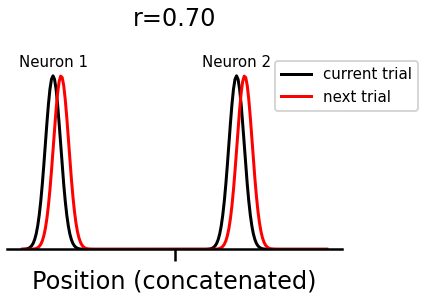

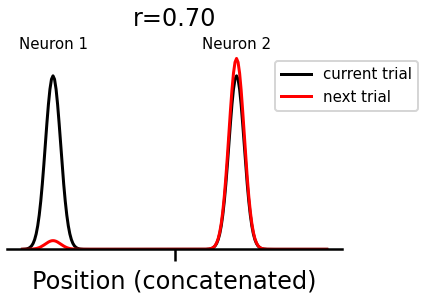

In [93]:
fig,ax=gen_sim_plot(jitter=5.3,modulation=1)
figfn = 'schematic_pos_induced_decorrelation'
ph.save_given_name(fig,figfn,figdir=figdir)

fig,ax=gen_sim_plot(jitter=0,modulation=0.05)
figfn = 'schematic_rate_induced_decorrelation'
ph.save_given_name(fig,figfn,figdir=figdir)


In [51]:
pf_key = 'peak'#'fr_peak'
# pf_key_sub =pf_params_recombined_all.loc[(slice(None),slice(None),pf_key)].loc[ma_ind]
df=pf_params_all.loc[(slice(None),slice(None),slice(None),slice(None),pf_key),:].droplevel(4)
pf_key_sub=df.reset_index(level=-1).loc[ma_ind_new].set_index('level_5',append='True')


In [55]:
pf_key_sub

0     1     2     3     4   \
                                   level_5                                 
e13_16f1 e13_16f1_210302 0 0.0 12  0        28.0  22.0  16.0  15.0  15.0   
                                   1        48.0  58.0  54.0  53.0  53.0   
                               35  0        68.0  59.0  67.0  62.0  60.0   
                               37  0         0.0   0.0   0.0   0.0   0.0   
                                   1        98.0  98.0  98.0  98.0  98.0   
...                                          ...   ...   ...   ...   ...   
e16_3m2  e16_3m2_211213  1 0.0 157 0        17.0  19.0  17.0  19.0  19.0   
                           1.0 157 0        19.0  18.0  17.0  17.0  16.0   
                                   1        44.0  40.0  39.0  39.0  37.0   
                           0.0 190 0        14.0   8.0   6.0  14.0  11.0   
                           1.0 190 0        13.0  12.0   7.0   8.0  15.0   

                                              5     6     7     8     9   ...  \
                                   level_5                                ...   
e13_16f1 e13_16f1_210302 0 0.0 12  0        15.0  18.0  19.0  13.0  11.0  ...   
                                   1        53.0  52.0  52.0  53.0  52.0  ...   
                               35  0        62.0  67.0  65.0  63.0  68.0  ...   
                               37  0         0.0   0.0   0.0   0.0   0.0  ...   
                                   1        98.0  98.0  98.0  98.0  98.0  ...   
...                                          ...   ...   ...   ...   ...  ...   
e16_3m2  e16_3m2_211213  1 0.0 157 0        17.0  18.0  15.0  18.0  18.0  ...   
                           1.0 157 0        18.0  17.0  17.0  15.0  15.0  ...   
                                   1        42.0  41.0  41.0  42.0  43.0  ...   
                           0.0 190 0        12.0   9.0  10.0   6.0  13.0  ...   
                           1.0 190 0         8.0  13.0  13.0  13.0  12.0  ...   

                                            27  28  29  30  31  32  33  34  \
                                   level_5                                   
e13_16f1 e13_16f1_210302 0 0.0 12  0       NaN NaN NaN NaN NaN NaN NaN NaN   
                                   1       NaN NaN NaN NaN NaN NaN NaN NaN   
                               35  0       NaN NaN NaN NaN NaN NaN NaN NaN   
                               37  0       NaN NaN NaN NaN NaN NaN NaN NaN   
                                   1       NaN NaN NaN NaN NaN NaN NaN NaN   
...                                         ..  ..  ..  ..  ..  ..  ..  ..   
e16_3m2  e16_3m2_211213  1 0.0 157 0       NaN NaN NaN NaN NaN NaN NaN NaN   
                           1.0 157 0       NaN NaN NaN NaN NaN NaN NaN NaN   
                                   1       NaN NaN NaN NaN NaN NaN NaN NaN   
                           0.0 190 0       NaN NaN NaN NaN NaN NaN NaN NaN   
                           1.0 190 0       NaN NaN NaN NaN NaN NaN NaN NaN   

                                            35  36  
                                   level_5          
e13_16f1 e13_16f1_210302 0 0.0 12  0       NaN NaN  
                                   1       NaN NaN  
                               35  0       NaN NaN  
                               37  0       NaN NaN  
                                   1       NaN NaN  
...                                         ..  ..  
e16_3m2  e16_3m2_211213  1 0.0 157 0       NaN NaN  
                           1.0 157 0       NaN NaN  
                                   1       NaN NaN  
                           0.0 190 0       NaN NaN  
                           1.0 190 0       NaN NaN  

[10636 rows x 37 columns]

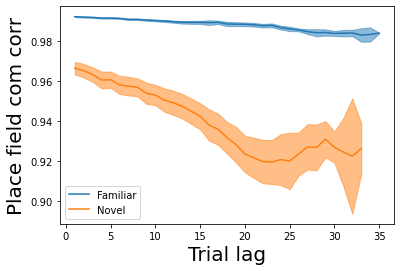

In [218]:
pf_key_corr_allsess = (pf_key_sub).groupby(level=(0,1,2)).corr()
# pf_key_corr_allsess = (pf_key_sub).groupby(level=(0,1,2)).apply(dist_one_df)

gpb_corr_sess=pf_key_corr_allsess.groupby(level=(0,1,2))
pv_corr_per_lag=gpb_corr_sess.apply(get_val_per_lag)
gpb_task=pv_corr_per_lag.groupby(level=(2))
fig,ax=plt.subplots()
isfam_d_str = {0:'Familiar',1:'Novel'}
for k,val in gpb_task:
    fig,ax=ph.mean_error_plot(val,fig=fig,ax=ax,label=isfam_d_str[k],c=f'C{k}')
    ax.set(xlabel='Trial lag',ylabel=f'Place field {pf_key} corr')
ax.legend()

In [414]:
pf_key_corr_allsess

0         1         2         3   \
e13_16f1 e13_16f1_210302 0 0   1.000000  0.615713  1.000000 -1.000000   
                           1   0.615713  1.000000  1.000000 -1.000000   
                           2   1.000000  1.000000  1.000000  0.675616   
                           3  -1.000000 -1.000000  0.675616  1.000000   
                           4   0.039775  0.480255 -1.000000  1.000000   
...                                 ...       ...       ...       ...   
e16_3m2  e16_3m2_211213  1 65       NaN       NaN       NaN       NaN   
                           66       NaN       NaN       NaN       NaN   
                           67       NaN       NaN       NaN       NaN   
                           68       NaN       NaN       NaN       NaN   
                           69       NaN       NaN       NaN       NaN   

                                     4         5         6         7   \
e13_16f1 e13_16f1_210302 0 0   0.039775  1.000000  0.199982  0.232062   
                           1   0.480255  1.000000  0.739279  0.802059   
                           2  -1.000000  0.657335  1.000000  1.000000   
                           3   1.000000  0.680363 -1.000000 -1.000000   
                           4   1.000000 -1.000000  0.773413  0.639934   
...                                 ...       ...       ...       ...   
e16_3m2  e16_3m2_211213  1 65       NaN       NaN       NaN       NaN   
                           66       NaN       NaN       NaN       NaN   
                           67       NaN       NaN       NaN       NaN   
                           68       NaN       NaN       NaN       NaN   
                           69       NaN       NaN       NaN       NaN   

                                     8         9   ...  60  61  62  63  64  \
e13_16f1 e13_16f1_210302 0 0   0.279630  1.000000  ... NaN NaN NaN NaN NaN   
                           1   0.742341  1.000000  ... NaN NaN NaN NaN NaN   
                           2   1.000000  0.405865  ... NaN NaN NaN NaN NaN   
                           3  -1.000000  0.351073  ... NaN NaN NaN NaN NaN   
                           4   0.750433 -1.000000  ... NaN NaN NaN NaN NaN   
...                                 ...       ...  ...  ..  ..  ..  ..  ..   
e16_3m2  e16_3m2_211213  1 65       NaN       NaN  ... NaN NaN NaN NaN NaN   
                           66       NaN       NaN  ... NaN NaN NaN NaN NaN   
                           67       NaN       NaN  ... NaN NaN NaN NaN NaN   
                           68       NaN       NaN  ... NaN NaN NaN NaN NaN   
                           69       NaN       NaN  ... NaN NaN NaN NaN NaN   

                               65  66  67  68  69  
e13_16f1 e13_16f1_210302 0 0  NaN NaN NaN NaN NaN  
                           1  NaN NaN NaN NaN NaN  
                           2  NaN NaN NaN NaN NaN  
                           3  NaN NaN NaN NaN NaN  
                           4  NaN NaN NaN NaN NaN  
...                            ..  ..  ..  ..  ..  
e16_3m2  e16_3m2_211213  1 65 NaN NaN NaN NaN NaN  
                           66 NaN NaN NaN NaN NaN  
                           67 NaN NaN NaN NaN NaN  
                           68 NaN NaN NaN NaN NaN  
                           69 NaN NaN NaN NaN NaN  

[3780 rows x 70 columns]

<Axes: >

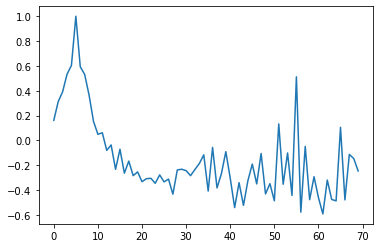

In [411]:
pf_key_corr.loc[5].plot()

In [322]:
wass_d_l

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,20.197759,23.821890,22.982630,19.279621,22.318145,20.247887,21.668078,23.454547,21.902637,...,22.267123,19.008375,19.471179,17.481743,19.152023,17.601058,19.821733,16.931657,19.739896,23.555463
1,20.197759,0.000000,8.720723,8.214246,7.124096,8.564200,7.140474,8.033997,8.313424,5.561409,...,6.005996,5.980166,4.805945,5.107295,6.793874,11.371946,5.757210,10.855212,9.580180,19.999553
2,23.821890,8.720723,0.000000,0.943375,4.754337,1.594851,6.071520,2.859893,0.795764,4.288579,...,9.226379,9.062449,8.920269,6.742732,10.689900,15.966743,5.851482,14.738314,15.080801,25.767415
3,22.982630,8.214246,0.943375,0.000000,3.814171,1.657822,5.758454,2.546826,0.962685,4.369130,...,9.259266,8.749383,8.605414,5.899489,10.376833,15.653676,5.538415,14.425247,14.748346,25.454348
4,19.279621,7.124096,4.754337,3.814171,0.000000,3.651073,3.709070,2.655706,4.310244,5.600643,...,9.883338,7.143413,6.921637,3.681367,8.471025,13.591707,5.110917,12.363278,12.644484,23.392379
5,22.318145,8.564200,1.594851,1.657822,3.651073,0.000000,5.153135,1.825679,2.262066,4.801616,...,9.449075,8.187731,7.959320,5.947884,9.543043,14.819858,4.802412,13.591592,13.928017,24.623313
6,20.247887,7.140474,6.071520,5.758454,3.709070,5.153135,0.000000,3.354808,6.222464,4.076056,...,8.073343,5.061462,5.457070,4.622718,5.651841,9.895239,3.842530,8.836251,9.210266,19.695894
7,21.668078,8.033997,2.859893,2.546826,2.655706,1.825679,3.354808,0.000000,3.010837,4.453599,...,8.997071,6.614826,6.249466,4.925829,7.832336,13.106850,4.079248,11.878421,12.255345,22.907522
8,23.454547,8.313424,0.795764,0.962685,4.310244,2.262066,6.222464,3.010837,0.000000,4.415883,...,9.362599,9.213393,9.069396,6.369944,10.840844,16.117687,6.002426,14.889258,15.170464,25.918359
9,21.902637,5.561409,4.288579,4.369130,5.600643,4.801616,4.076056,4.453599,4.415883,0.000000,...,4.994132,4.797510,5.135101,4.499232,6.445293,11.701804,2.106262,10.563357,10.992813,21.502476


<Axes: >

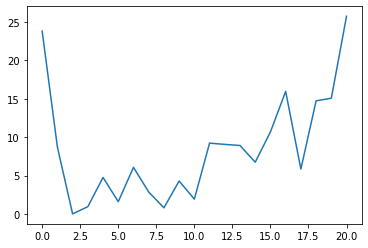

In [314]:
tr_pre_popup = 2
wass_d_l = {}
for tr_post_popup in frmap_oneuid.columns:
    wass_d=scipy.stats.wasserstein_distance(frmap_oneuid.index,frmap_oneuid.index,u_weights=frmap_oneuid.loc[:,tr_pre_popup],
                                 v_weights=frmap_oneuid.loc[:,tr_post_popup])
    wass_d_l[tr_post_popup] = wass_d
wass_d_l = pd.Series(wass_d_l)
wass_d_l.plot()

In [299]:

scipy.stats.pearsonr(frmap_oneuid.loc[:,2],frmap_oneuid.loc[:,9])

PearsonRResult(statistic=0.9254364574035843, pvalue=1.14171725051465e-42)

Text(0.5, 1.0, 'place field width')

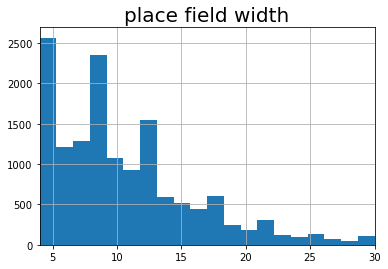

In [130]:
width=all_fields_recombined_all['end']-all_fields_recombined_all['start']
width = width.astype(float).dropna()
ax=(width).hist(bins=20)
plt.xlim([4,30])
ax.set_title('place field width')

1.6860843830553431 0.5449264473094236 2.384510797172963


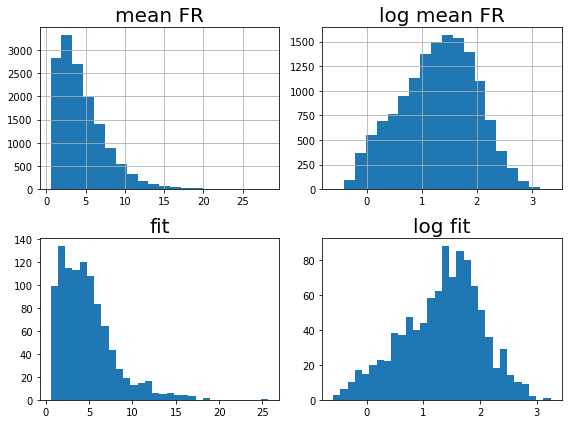

In [142]:
fig,axs=plt.subplots(2,2,figsize=(8,6))
eps=1e-10
fr=all_fields_recombined_all['fr_mean'].astype('float').dropna()
ax=axs[0,0]
ax=fr.hist(bins=20,ax=ax)
ax.set_title('mean FR')
ax=axs[0,1]
np.log(all_fields_recombined_all['fr_mean'].astype('float').dropna()+eps).hist(bins=20,ax=ax)
ax.set_title('log mean FR')


fit_a,fit_loc,fit_b=scipy.stats.gamma.fit(fr)
print(fit_a,fit_loc,fit_b)
fit_sample=scipy.stats.gamma.rvs(fit_a,loc=fit_loc,scale=fit_b,size=1000)
ax=axs[1,0]
_=ax.hist(fit_sample,bins=30)
ax.set_title('fit')
ax=axs[1,1]
_=ax.hist(np.log(fit_sample+eps),bins=30)
ax.set_title('log fit')
# plt.xlim([4,30])
plt.tight_layout()

Text(0.5, 1.0, 'log')

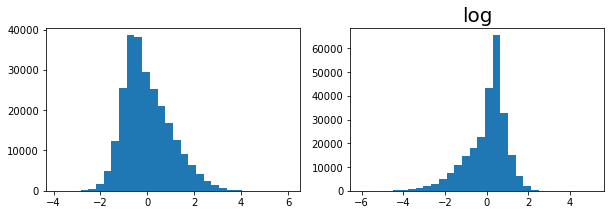

In [157]:
fr_mean_all=pf_params_all.loc[(slice(None),slice(None),slice(None),slice(None),'fr_mean'),:]
fr_mean_zscore=scipy.stats.zscore(fr_mean_all,axis=1,nan_policy='omit')
eps=1e-10
log_fr_mean_zscore=scipy.stats.zscore(np.log(fr_mean_all+eps),axis=1,nan_policy='omit')
fig,axs=plt.subplots(1,2,figsize=(10,3))
ax=axs[0]
ax.hist(fr_mean_zscore.values.flatten(),bins=30)
ax=axs[1]
ax.hist(log_fr_mean_zscore.values.flatten(),bins=30)
ax.set_title('log')



log cv mean 0.5202096672936729 log cv std 0.5584699805053144


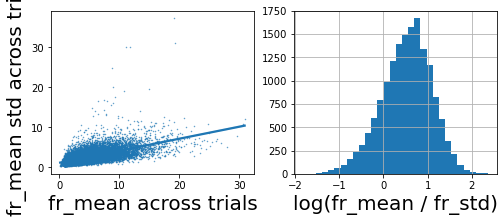

In [205]:
fr_mean_std_all=fr_mean_all.std(axis=1)
fr_mean_mean_all=fr_mean_all.mean(axis=1)
fr_mean_cv_all = fr_mean_mean_all /  fr_mean_std_all
fig,axs=plt.subplots(1,2,figsize=(8,3))
ax=axs[0]
ax=sns.regplot(fr_mean_mean_all,fr_mean_std_all,scatter_kws={'s':0.2},ax=ax)
ax.set(xlabel='fr_mean across trials',ylabel='fr_mean std across trials')
ax=axs[1]
log_fr_mean_cv_all=np.log(fr_mean_cv_all)
log_fr_mean_cv_all.hist(ax=ax,bins=30)
ax.set(xlabel='log(fr_mean / fr_std)')
print('log cv mean', log_fr_mean_cv_all.mean(),'log cv std', log_fr_mean_cv_all.std())


(array([4.153e+03, 6.673e+03, 3.295e+03, 1.107e+03, 3.480e+02, 1.060e+02,
        2.200e+01, 5.000e+00, 7.000e+00, 3.000e+00]),
 array([ 0.16441084,  1.21395547,  2.2635001 ,  3.31304472,  4.36258935,
         5.41213398,  6.46167861,  7.51122323,  8.56076786,  9.61031249,
        10.65985712]),
 <BarContainer object of 10 artists>)

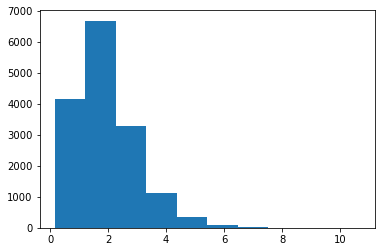

In [203]:
plt.hist(fr_mean_cv_all)

0.8484271227647034 3.9999999999999996 6.5788776343264495


(4.0, 30.0)

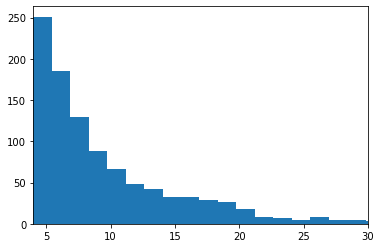

In [94]:
fit_a,fit_loc,fit_b=scipy.stats.gamma.fit(width)
print(fit_a,fit_loc,fit_b)
fit_sample=scipy.stats.gamma.rvs(fit_a,loc=fit_loc,scale=fit_b,size=1000)
plt.hist(fit_sample,bins=30)
plt.xlim([4,30])